In [2]:
!unzip -q '/content/drive/MyDrive/AI Team/Tasks/2023-09-Sprint2/Digit_Recognition.zip' -d '/content/'

replace /content/Data/image_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os
import json
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
with open('/content/labels.json', 'r') as f:
    data = json.load(f)

labels = data['labels']
image_dir = '/content/Data/'

images = []
image_labels = []
progress = 0

for label_data in labels:
  filename = os.path.join(image_dir, label_data['filename'])
  label = label_data['label']

  image = Image.open(filename)
  image_array = np.array(image).flatten()

  images.append(image_array)
  image_labels.append(label)

  progress += 1
  if progress % 100 == 0:
    print(f'Progress: {progress} / 8000')

images = np.array(images, dtype=np.float64)
image_labels = np.array(image_labels)

Progress: 100 / 8000
Progress: 200 / 8000
Progress: 300 / 8000
Progress: 400 / 8000
Progress: 500 / 8000
Progress: 600 / 8000
Progress: 700 / 8000
Progress: 800 / 8000
Progress: 900 / 8000
Progress: 1000 / 8000
Progress: 1100 / 8000
Progress: 1200 / 8000
Progress: 1300 / 8000
Progress: 1400 / 8000
Progress: 1500 / 8000
Progress: 1600 / 8000
Progress: 1700 / 8000
Progress: 1800 / 8000
Progress: 1900 / 8000
Progress: 2000 / 8000
Progress: 2100 / 8000
Progress: 2200 / 8000
Progress: 2300 / 8000
Progress: 2400 / 8000
Progress: 2500 / 8000
Progress: 2600 / 8000
Progress: 2700 / 8000
Progress: 2800 / 8000
Progress: 2900 / 8000
Progress: 3000 / 8000
Progress: 3100 / 8000
Progress: 3200 / 8000
Progress: 3300 / 8000
Progress: 3400 / 8000
Progress: 3500 / 8000
Progress: 3600 / 8000
Progress: 3700 / 8000
Progress: 3800 / 8000
Progress: 3900 / 8000
Progress: 4000 / 8000
Progress: 4100 / 8000
Progress: 4200 / 8000
Progress: 4300 / 8000
Progress: 4400 / 8000
Progress: 4500 / 8000
Progress: 4600 / 80

In [14]:
image_labels = image_labels.reshape((8000, 1))
images /= 255

In [16]:
print(images.shape, images.dtype)
print(image_labels.shape, image_labels.dtype)

(8000, 784) float64
(8000, 1) int64


[2]


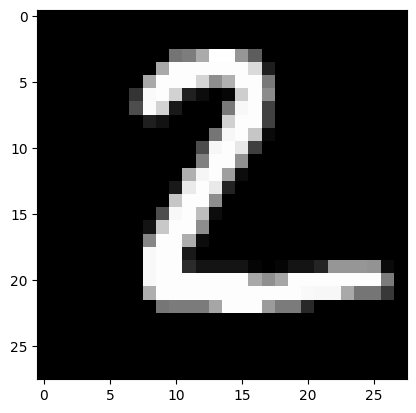

In [21]:
plt.imshow(images[1].reshape(28, 28) * 255, cmap='gray')
print(image_labels[1])

In [22]:
train_ratio = 0.6
valid_ratio = 0.2
test_ratio = 0.2

In [23]:
# train data
train_size = int(train_ratio * images.shape[0])
train_images = images[:train_size]
train_labels = image_labels[:train_size]

# valid data
valid_size = int(valid_ratio * images.shape[0])
valid_images = images[train_size:train_size + valid_size]
valid_labels = image_labels[train_size:train_size + valid_size]

# test data
test_images = images[train_size + valid_size:]
test_labels = image_labels[train_size + valid_size:]

In [25]:
print(f'Train: {train_images.shape}, {train_labels.shape}')
print(f'valid: {valid_images.shape}, {valid_labels.shape}')
print(f'Test: {test_images.shape}, {test_labels.shape}')

Train: (4800, 784), (4800, 1)
valid: (1600, 784), (1600, 1)
Test: (1600, 784), (1600, 1)


In [26]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [29]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
print('model Details are : ')
print(model.summary())

model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                  

In [48]:
epochs = 100
Thismodel = model.fit(train_images, train_labels ,epochs=epochs,batch_size=64,verbose=1, callbacks=[checkpoint_callback],validation_data=(valid_images, valid_labels)
)

Epoch 1/100
75/75 [==============================] - 1s 11ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.3047 - val_accuracy: 0.9563
Epoch 2/100
19/75 [======>.......................] - ETA: 0s - loss: 0.0115 - accuracy: 0.9951

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1s 7ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.2763 - val_accuracy: 0.9544
Epoch 3/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.2635 - val_accuracy: 0.9544
Epoch 4/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 0.2587 - val_accuracy: 0.9550
Epoch 5/100
75/75 [==============================] - 1s 11ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 0.2431 - val_accuracy: 0.9556
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.2842 - val_accuracy: 0.9494
Epoch 7/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0139 - accuracy: 0.9946 - val_loss: 0.2695 - val_accuracy: 0.9513
Epoch 8/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.2678 - val_accuracy: 0.9550
Epoch 9/100
75/75 [==

In [49]:
modelLoss, modelAccuracy = model.evaluate(train_images, train_labels)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

150/150 [==============================] - 0s 2ms/step - loss: 4.5291e-05 - accuracy: 1.0000
Test Loss is 4.529096622718498e-05
Test Accuracy is 1.0


In [50]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/models/model_checkpoint_epoch_{epoch:02d}.h5',
    save_best_only=False,
    save_weights_only=False,
    verbose=0)

In [51]:
epoch_to_load = 49
best_model = tf.keras.models.load_model(f'/content/models/model_checkpoint_epoch_{epoch_to_load:02d}.h5')

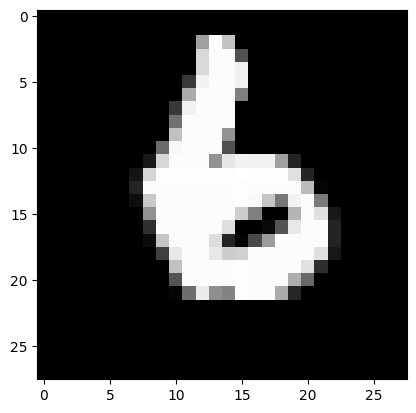

1/1 [==============================] - 0s 206ms/step
Predicted Label: 6
Actual Label: 6


In [53]:
random_index = np.random.randint(0, test_images.shape[0])
random_image = test_images[random_index]
random_label = test_labels[random_index][0]

plt.imshow(random_image.reshape(28, 28) * 255, cmap='gray')
plt.show()

random_image = random_image.reshape(1, 784)
prediction = best_model.predict(random_image)
print(f'Predicted Label: {np.argmax(prediction)}')
print(f'Actual Label: {random_label}')